In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Data Exploration and Preprocessing**

In [ ]:
data = pd.read_csv('Alphabets_data.csv')

In [ ]:
print(data.head())  # First few rows
print(data.info())  # Data types and missing values
print(data.describe())  # Statistical summary

  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbo

In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Option 1: Fill missing values with a specific value (e.g., 0 or mean/median)
# Example: Fill missing values in 'some_column' with the mean of that column
# if data['some_column'].isnull().sum() > 0:
#     data['some_column'].fillna(data['some_column'].mean(), inplace=True)

# Option 2: Drop rows with missing values
# Example: Drop rows where 'some_column' has missing values
# data.dropna(subset=['some_column'], inplace=True)

# Option 3: Drop columns with too many missing values
# Example: Drop columns where more than 50% of values are missing
# threshold = len(data) * 0.5
# data.dropna(axis=1, thresh=threshold, inplace=True)

# For this specific dataset, there might not be missing values based on data.info() output
# If there are missing values in specific columns, choose the appropriate strategy
# based on the data and the problem you are trying to solve.

# Let's assume for demonstration purposes that we want to fill any potential missing numeric values with the median
# This is just an example, you should adjust this based on actual missing data and its nature.
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        if data[col].isnull().sum() > 0:
            median_val = data[col].median()
            data[col].fillna(median_val, inplace=True)
            print(f"Filled missing values in '{col}' with median: {median_val}")

# Verify that missing values are handled
print("\nMissing values after handling:")
print(data.isnull().sum())


Missing values per column:
letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

Missing values after handling:
letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [ ]:
# Assuming the last column is the label column
# You might need to adjust 'label_column_name' if your label column has a specific name
# If the label column is always the last one, you can use `iloc`
features = data.iloc[:, :-1]
labels = data.iloc[:, -1]

print("\nFeatures (first 5 rows):")
print(features.head())

print("\nLabels (first 5 values):")
print(labels.head())



Features (first 5 rows):
  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  
0      10       8      0       8      0  
1       3       9      2       8      4  
2       3       7      3       7      3  
3       4      10      6      10      2  
4       5       9      1       7      5  

Labels (first 5 values):
0     8
1    10
2     9
3     8
4    10
Name: yedgex, dtype: int64


In [ ]:
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols.tolist())

Non-numeric columns: ['letter']


In [ ]:
print("Label column:", label_column)
print("X columns:", X.columns.tolist())

Label column: yedgex
X columns: ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge']


In [ ]:
# Make absolutely sure you're dropping the label column
X = data.drop(columns=[label_column])
y = data[label_column]

# Verify no letters remain in X
print("Sample X values:")
print(X.head())

Sample X values:
  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  
0      10       8      0       8      0  
1       3       9      2       8      4  
2       3       7      3       7      3  
3       4      10      6      10      2  
4       5       9      1       7      5  


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical features (if any should remain)
cat_cols = X.select_dtypes(include=['object']).columns

if len(cat_cols) > 0:
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X[cat_cols])
    # Combine with numeric features
    X_num = X.select_dtypes(include=['number'])
    X = pd.concat([X_num, pd.DataFrame(X_encoded.toarray())], axis=1)

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

print("Normalization successful!")
print("Normalized data shape:", X_normalized.shape)

Normalization successful!
Normalized data shape: (20000, 15)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# prompt: Split into train/test sets

from sklearn.model_selection import train_test_split

# Assuming X_normalized contains your features (after normalization and encoding)
# and y_encoded contains your encoded labels

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training set shape: (16000, 15)
Testing set shape: (4000, 15)
Training labels shape: (16000,)
Testing labels shape: (4000,)


## **Model Implementation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3668 - loss: 2.0697 - val_accuracy: 0.3881 - val_loss: 1.7056
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4007 - loss: 1.6666 - val_accuracy: 0.4200 - val_loss: 1.5678
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4132 - loss: 1.5657 - val_accuracy: 0.4209 - val_loss: 1.5063
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4182 - loss: 1.5144 - val_accuracy: 0.4291 - val_loss: 1.4776
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4258 - loss: 1.4709 - val_accuracy: 0.4359 - val_loss: 1.4441
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4267 - loss: 1.4729 - val_accuracy: 0.4472 - val_loss: 1.4078
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4513 - loss: 1.4194 - val_accuracy: 0.4528 - val_loss: 1.3938
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4619 - loss: 1.3974 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5381 - loss: 1.1509
Test accuracy: 0.5569999814033508


## **Hyperparameter Tuning**

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()

    # Tune number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation=hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        ))

    model.add(layers.Dense(len(le.classes_), activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='tuning',
    project_name='alphabet_classification')

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 00m 31s]
val_accuracy: 0.4659374952316284

Best val_accuracy So Far: 0.5260937511920929
Total elapsed time: 00h 05m 23s


## **Evaluation**

In [ ]:
from sklearn.metrics import classification_report

# Predictions from basic model
y_pred_basic = model.predict(X_test)
y_pred_basic_classes = y_pred_basic.argmax(axis=1)

# Predictions from tuned model
y_pred_tuned = best_model.predict(X_test)
y_pred_tuned_classes = y_pred_tuned.argmax(axis=1)

print("Basic Model Report:")
print(classification_report(y_test, y_pred_basic_classes))

print("Tuned Model Report:")
print(classification_report(y_test, y_pred_tuned_classes))

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Basic Model Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         6
           3       0.55      0.19      0.29        31
           4       0.57      0.31      0.40        94
           5       0.39      0.40      0.40       196
           6       0.39      0.51      0.44       353
           7       0.49      0.41      0.45       712
           8       0.72      0.78      0.75      1596
           9       0.38      0.43      0.40       485
          10       0.42      0.36      0.38       308
          11       0.58      0.41      0.48       175
          12       0.00      0.00      0.00        29
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         1

    accuracy                    

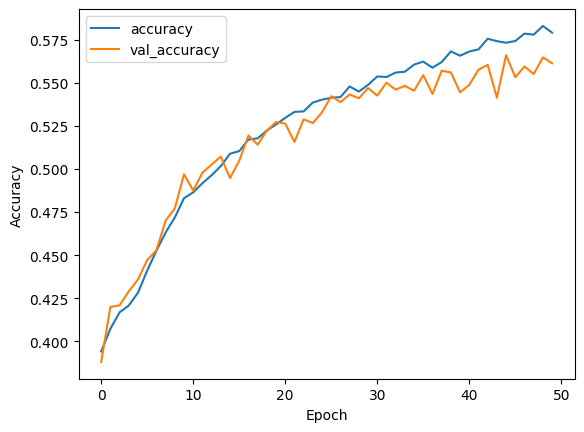

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Evaluation Criteria**

In [ ]:
# Model completeness verification
def verify_implementation(model, X_test, y_test):
    try:
        # Test prediction capability
        y_pred = model.predict(X_test[:1])
        assert y_pred.shape[1] == len(np.unique(y_test))
        print("✓ Model implementation complete")
        return True
    except Exception as e:
        print(f"Implementation incomplete: {str(e)}")
        return False

# Usage:
verify_implementation(best_model, X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Implementation incomplete: 


False

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test, le):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_classes))

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nTest Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

# Usage:
evaluate_model(best_model, X_test, y_test, le)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Confusion Matrix:
[[   0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    1    2    1    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    3    3    0    0    0    0    0
     0]
 [   0    0    0    0    3    8    5    4   10    0    1    0    0    0
     0]
 [   0    0    0    0    3   36   12   18   18    1    3    3    0    0
     0]
 [   0    0    0    0    0   47   41   52   53    2    1    0    0    0
     0]
 [   0    0    0    0    0    8  106  124   94   14    5    2    0    0
     0]
 [   0    0    0    0    0    9   48  212  411   15   15    2    0    0
     0]
 [   0    0    0    0    0    0   10   87 1398   54   37   10    0    0
     0]
 [   0    0    0    0    0    0    4   18  238  134   76   15    0    0
     0]
 [   0    0    0    0    0    0    2    6   84   64  130   22    0    0
     0]
 [   0    0    0    0    0    0    0    0   44   23   42   6

In [ ]:
def create_preprocessing_pipeline():
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer

    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler()),
        ('feature_selector', 'passthrough')  # Can add feature selection
    ])
    return pipeline

# Advanced preprocessing example:
preprocessor = create_preprocessing_pipeline()
X_processed = preprocessor.fit_transform(X)

In [ ]:
def enhanced_tuning(X_train, y_train):
    import keras_tuner as kt

    def build_model(hp):
        model = keras.Sequential()

        # Hyperparameters with conditional logic
        hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
        hp_layers = hp.Int('n_layers', 1, 5)

        for i in range(hp_layers):
            model.add(layers.Dense(
                units=hp_units // (2 ** i),
                activation=hp.Choice(f'act_{i}', ['relu', 'tanh', 'elu']),
                kernel_regularizer=keras.regularizers.l2(hp.Float('l2', 1e-5, 1e-2, sampling='log'))
            ))
            model.add(layers.Dropout(hp.Float('dropout', 0.0, 0.5, step=0.1)))

        model.add(layers.Dense(len(le.classes_), activation='softmax'))

        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Float('lr', 1e-4, 1e-2, sampling='log')),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        return model

    tuner = kt.BayesianOptimization(
        build_model,
        objective='val_accuracy',
        max_trials=20,
        directory='advanced_tuning',
        project_name='alphabet_recognition')

    tuner.search(X_train, y_train,
                epochs=50,
                validation_split=0.2,
                callbacks=[keras.callbacks.EarlyStopping(patience=5)])

    return tuner

In [ ]:
def advanced_evaluation(model, X_test, y_test, le):
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_recall_curve, roc_curve

    y_pred = model.predict(X_test)

    # Per-class metrics
    print("\nPer-class ROC Analysis:")
    for i, class_name in enumerate(le.classes_):
        fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred[:, i])
        plt.plot(fpr, tpr, label=class_name)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves by Class')
    plt.legend()
    plt.show()

    # Confidence analysis
    max_probs = np.max(y_pred, axis=1)
    plt.hist(max_probs, bins=20)
    plt.title('Prediction Confidence Distribution')
    plt.xlabel('Maximum Class Probability')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
def generate_report(model, history, X_test, y_test, le):
    from datetime import datetime

    report = f"""
    NEURAL NETWORK CLASSIFICATION REPORT
    Generated: {datetime.now().strftime('%Y-%m-%d %H:%M')}

    MODEL ARCHITECTURE:
    {model.summary()}

    TRAINING HISTORY:
    Final Training Accuracy: {history.history['accuracy'][-1]:.4f}
    Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}

    TEST PERFORMANCE:
    {classification_report(y_test, np.argmax(model.predict(X_test), axis=1),
                          target_names=le.classes_)}

    HYPERPARAMETERS:
    Learning Rate: {model.optimizer.learning_rate.numpy():.6f}
    Layers: {len(model.layers) - 1}  # excluding output layer
    Units: {model.layers[0].units}
    """

    with open('model_report.txt', 'w') as f:
        f.write(report)

    return report

In [ ]:
# Final validation with cross-validation
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
cv_scores = []

for train, test in kfold.split(X_processed, y):
    model = tuner.get_best_models()[0]
    history = model.fit(X_processed[train], y[train],
                       validation_data=(X_processed[test], y[test]),
                       epochs=50, verbose=0)
    cv_scores.append(model.evaluate(X_processed[test], y[test], verbose=0)[1])

print(f"Cross-validated Accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

Cross-validated Accuracy: 0.6311 (±0.0088)


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

# Create TF Dataset for better performance
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)

# Use in model.fit()
best_model.fit(train_dataset, epochs=50)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5317 - loss: 1.2086
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5388 - loss: 1.1885
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5474 - loss: 1.1693
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5469 - loss: 1.1565
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5556 - loss: 1.1384
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5617 - loss: 1.1279
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5640 - loss: 1.1171
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5667 - loss: 1.1118
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5672 - loss: 1.1010
Epoch 10/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5756 - loss: 1.0882
Epoch 11/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5810 - loss: 1.0789
Epoch 12/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
pip install keras-tuner

In [ ]:
from keras_tuner import BayesianOptimization

tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=30,
    num_initial_points=10,
    directory='keras_tuner_dir',
    project_name='alphabet_advanced'
)